<a href="https://colab.research.google.com/github/Ashwith25/Marketing-Campaign-for-Banking-Products/blob/master/Internship_studio_ML_PowerTransformation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Marketing Campaign for Banking Products


The bank has a growing customer base. The bank wants to increase borrowers (asset
customers) base to bring in more loan business and earn more through the interest on
loans. So , the bank wants to convert the liability based customers to personal loan
customers. (while retaining them as depositors). A campaign that the bank ran last year
for liability customers showed a healthy conversion rate of over 9% success. The
department wants you to build a model that will help them identify the potential
customers who have a higher probability of purchasing the loan. This will increase the
success ratio while at the same time reduce the cost of the campaign.

Attribute Information:
- ID: Customer ID
- Age: Customer's age in completed years
- Experience: #years of professional experience
- Income: Annual income of the customer ($000)

- ZIP Code: Home Address ZIP code.
- Family: Family size of the customer
- CCAvg: Avg. spending on credit cards per month ($000)

- Education: Education Level. 1: Undergrad; 2: Graduate; 3:
Advanced/Professional
- Mortgage: Value of house mortgage if any. ($000)
- Personal Loan: Did this customer accept the personal loan offered in the last
campaign?
- Securities Account: Does the customer have a securities account with the bank?
- CD Account: Does the customer have a certificate of deposit (CD) account with
the bank?
- Online: Does the customer use internet banking facilities?
- Credit card: Does the customer use a credit card issued by the bank?

<strong>Objective:<br>
The classification goal is to predict the likelihood of a liability customer buying personal
loans.</strong>

<b> To deal with this problem, we will split the process into 9 steps for better understanding.


## 1. Import the datasets and libraries, check datatype, statistical summary, shape, null
values etc

We will be importing all the necessary libraries which will be required in our project.
- numpy, scipy and pandas for data analysis.
- matplotlib and seaborn for plotting graphs
- sklearn for training our model
- pickle for saving our best model

In [142]:
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns
import io
import pickle
from sklearn.preprocessing import PowerTransformer, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from google.colab import files

%matplotlib inline

Now we will be importing out CSV file which have the necessary data. Let's have a quick look on the data.

In [143]:
fl = files.upload()

Saving internship_studio_project.csv to internship_studio_project (1).csv


In [144]:
# content = pd.read_csv("/content/drive/My Drive/internship_studio_project.csv")
content = pd.read_csv(io.BytesIO(fl[list(fl.keys())[0]]))
content.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


Now let's see if our data is completely/properly uploaded or not. This can be done either by looking at the shape or by looking at the end of the dataset.
Let's first see the end of the dataset.

In [145]:
content.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


To check the shape of the dataset, <b>shape</b> variable is used.

In [146]:
content.shape

(5000, 14)

It is necessary to initially check if all the data is proper or not. This we can do using <b>describe()</b>. This returns us all the necessary data such as mean, standard deviation, min, max, etc. 

In [147]:
content.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


As we can see in the _Experience_ column, the <b>min</b> value is -3 which is not possible. This indicates that the cleaning of the data must be done. 

In a similar way as that of <b>describe()</b>, we can also see the datatypes and non-null value count by using an in-built function called <b>info()</b>. This will return the count of non-null values along with the datatype of thaat particular column.

In [148]:
content.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


This completes our 1st step. All the necessary libraries are imported. We saw what all are the attributes of our Columns, based upon which some decisons were also taken where cleaning of the data is to be done as the _Experience_ column had some wrong data. 



Now let's move onto our 2nd step.

## 2. Check if you need to clean the data for any of the variables

Firstly, let's first remove all the data which had faulty _Experience_.</br>
This we will be storing in a new variable.

In [149]:
content.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [150]:
new_content = content.where(content["Experience"]>=0).dropna()

Now let's see if our data is ready to be used or not by using <b>describe()</b> as used earlier.

In [151]:
new_content.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000
mean,2501.268795,45.557195,20.331043,73.814470,93151.573363,2.391471,1.935926,1.878941,56.634398,0.097009,0.104285,0.061035,0.597009,0.294058
std,1443.277676,11.320735,11.311973,46.112596,2126.669017,1.148444,1.747694,0.839745,101.828885,0.296000,0.305660,0.239418,0.490549,0.455664
min,1.000000,24.000000,0.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1254.750000,36.000000,10.750000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2497.500000,46.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.600000,3.000000,101.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Let's save the target feature in some other variable.

In [152]:
personal_loan = new_content["Personal Loan"]

As _ID_ will be different for each customer, it has nothing to with the customer taking the loan. So it is acting as noise in our dataset. Hence it will be better if removed. <br><br>
To check the significance of a column, we can check their correlation factor.

In [153]:
for i in new_content.columns:
    print(f"Correlation between {i} and Personal Loan is",new_content[i].corr(personal_loan))

Correlation between ID and Personal Loan is -0.025123894301036828
Correlation between Age and Personal Loan is -0.014203560746489142
Correlation between Experience and Personal Loan is -0.01412080970301723
Correlation between Income and Personal Loan is 0.5042276559680586
Correlation between ZIP Code and Personal Loan is 0.0002510467178026715
Correlation between Family and Personal Loan is 0.06308797762627483
Correlation between CCAvg and Personal Loan is 0.36938792955748107
Correlation between Education and Personal Loan is 0.1383390364475152
Correlation between Mortgage and Personal Loan is 0.14232184189537317
Correlation between Personal Loan and Personal Loan is 1.0
Correlation between Securities Account and Personal Loan is 0.022215862315837633
Correlation between CD Account and Personal Loan is 0.31576939842819973
Correlation between Online and Personal Loan is 0.006175184362285571
Correlation between CreditCard and Personal Loan is 0.002775729174601692


As we can see, _ID, Age, ZIP Code_ and _Experience_ are hardly even related to our target variable. _Income_ plays a important role in customer taking the personal loan. So we can drop the noisy columns (_ID, Age_ and _Experience_) to make our prediction for efficient.

In [154]:
new_content.drop(["ID", "Age", "ZIP Code", "Experience"], axis=1, inplace=True)
new_content

,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,49.0,4.0,1.6,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,34.0,3.0,1.5,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,11.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100.0,1.0,2.7,2.0,0.0,0.0,0.0,0.0,0.0,0.0
4,45.0,4.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
4995,40.0,1.0,1.9,3.0,0.0,0.0,0.0,0.0,1.0,0.0
4996,15.0,4.0,0.4,1.0,85.0,0.0,0.0,0.0,1.0,0.0
4997,24.0,2.0,0.3,3.0,0.0,0.0,0.0,0.0,0.0,0.0
4998,49.0,3.0,0.5,2.0,0.0,0.0,0.0,0.0,1.0,0.0


This completes are 2nd step. Till now we have imported the necessary libraries and cleaned our data.<br><br>
Now let's move on to step 3 where we'll be studying our dataset.

## 3. EDA: Study the data distribution in each attribute and target variable, share your findings.

Initially, we need to check what are the unique elements in each columns. This is possible using <b>unique()</b>, this returns a list of all the unique elements of that column.

In [155]:
for i in new_content.columns:
    print(f"Unique elements of {i} are {new_content[i].nunique()}")

Unique elements of Income are 162
Unique elements of Family are 4
Unique elements of CCAvg are 108
Unique elements of Education are 3
Unique elements of Mortgage are 347
Unique elements of Personal Loan are 2
Unique elements of Securities Account are 2
Unique elements of CD Account are 2
Unique elements of Online are 2
Unique elements of CreditCard are 2


People with zero mortgage value are: 

In [156]:
print("People with zero mortgage value are",len(new_content.where(new_content["Mortgage"]==0).dropna()))

People with zero mortgage value are 3422


Number of people with zero credit card spending per month are:

In [157]:
print("People with zero credit card spending are",len(new_content.where(new_content["CCAvg"]==0).dropna()))

People with zero credit card spending are 106


Value counts of all categorical columns are:

In [158]:
education = new_content["Education"].value_counts()
family = new_content["Family"].value_counts()
features = ["Securities Account", "CD Account", "Online", "CreditCard"]
yes_no = {0:"No", 1:"Yes"}
degree = {1: "Undergraduate", 2: "Graduate", 3:"Advanced/Professional"}

In [159]:
print("Details of Customers opting for,")
for i in features:
    print("\n",i)
    y_n = new_content[i].value_counts()
    for j in y_n.index:
        print(f"{yes_no[j]}:\t {y_n.loc[j]}")
print("\nEducation levels of Customers are,")
for i in education.index:
    print(f"{degree[i]}: {education.loc[i]}")
print("\nFamily strength of customers are,")
for i in family.index:
    print(f"{int(i)}: {family.loc[i]}")

Details of Customers opting for,

 Securities Account
No:	 4432
Yes:	 516

 CD Account
No:	 4646
Yes:	 302

 Online
Yes:	 2954
No:	 1994

 CreditCard
No:	 3493
Yes:	 1455

Education levels of Customers are,
Undergraduate: 2080
Advanced/Professional: 1481
Graduate: 1387

Family strength of customers are,
1: 1470
2: 1274
4: 1203
3: 1001


Plotting each feature can give us an idea on whether transformations are needed or not.

Correlation matrix would also help us identify the relationships between each and every features which we can compare with the above pairplot.

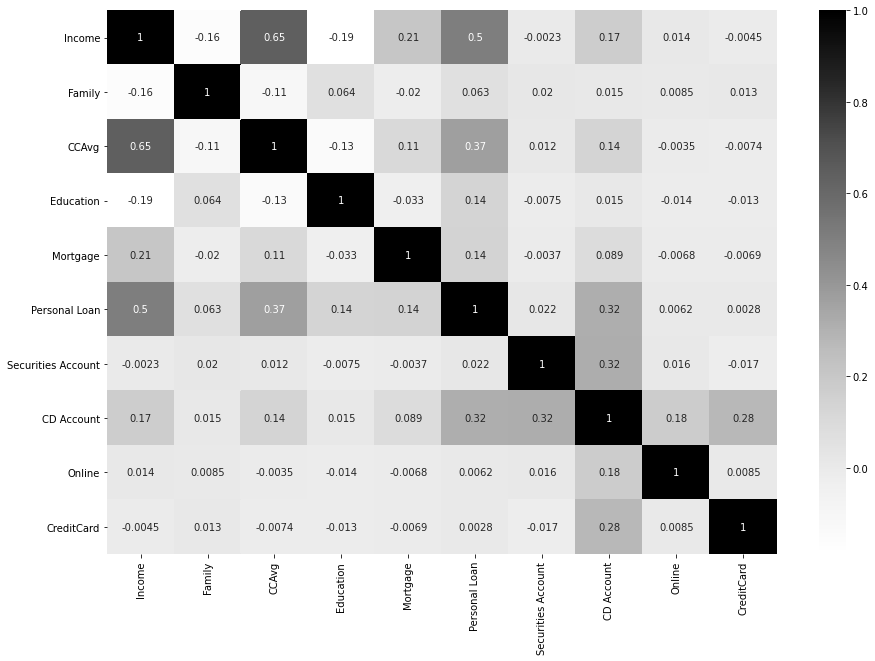

In [160]:
fig, ax = plot.subplots(figsize = (15,10))
sns.heatmap(new_content.corr(), cmap="Greys", annot = True)

<b>Univariate Analysis are graphs plotted considering only one variable.</b>
</br>
Univariate analysis of all the columnbs/features bare given below.

As, only _Income, CCAvg and Mortgage_ are the only fields who are highly ccorrelated with the target variable and the ones who might possibly have outliers. Outliers are values which are either extremely high or extremely low as compared to values of InterQuartile Range (IQR). <br>
This can be verified byt plotting boxplots for each of these features using seaborn's <b>boxplot()</b> method.

Skew value:  0.8420039289292482


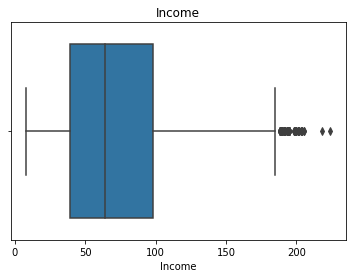

Skew value:  1.5946235307534944


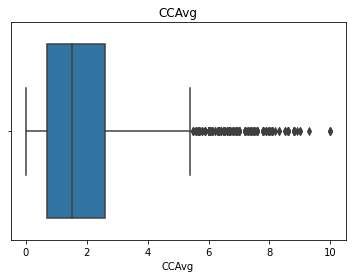

Skew value:  2.104585411431956


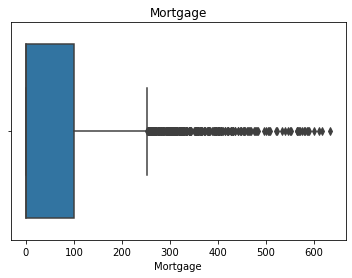

In [161]:
for i in ["Income", "CCAvg", "Mortgage"]:
    sns.boxplot(new_content[i])
    print("Skew value: ", new_content[i].skew())
    plot.title(i)
    plot.show()

The points marked with black dots represents <b>Outliers</b>. It is necessary to improve/remove them for better results. This we will be doing it in step 4.

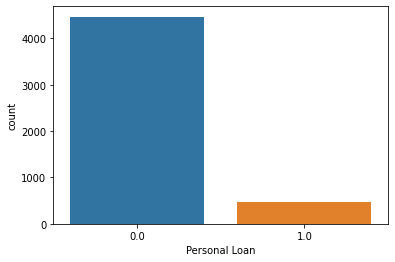

In [162]:
sns.countplot(new_content["Personal Loan"])

We can see that very few people have opted for the Personal Loan

Let's see what relationships do our feature variables have with our target.

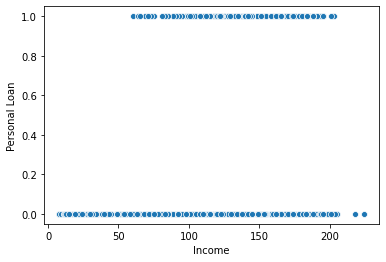

In [163]:
sns.scatterplot(new_content.Income, new_content["Personal Loan"])

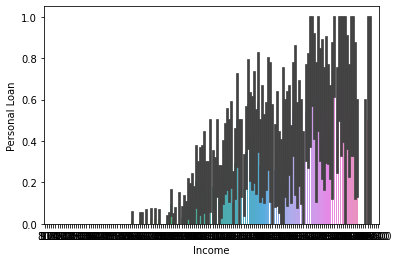

In [164]:
sns.barplot(new_content.Income, new_content["Personal Loan"])

By observing above two graphs, we can conclude that with increase in income, there are high chances that a customer would opt for Personal Loan.

Let's now plot each feature against every other feature to get an idea about their relationship. This can be done using seaborn's <b>pairplot()</b>.

In [165]:
# sns.pairplot(new_content, hue="Personal Loan", markers=["+","D"])
# plot.legend()

It is necessary to have our data as normalised as possible to increase the accuracy. Plotting them can help us identify them. For this, <b>distplot()</b> would be a good option.

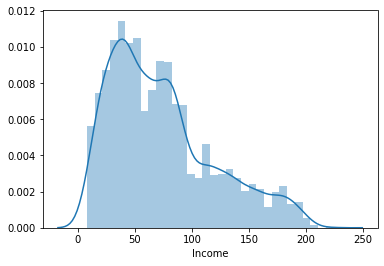

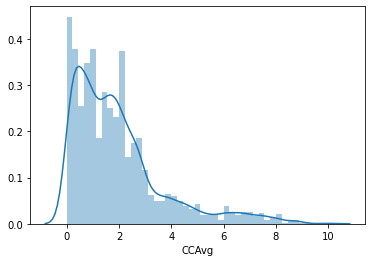

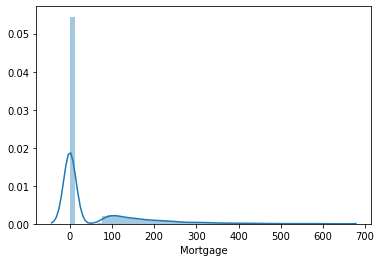

In [166]:
for i in ["Income", "CCAvg", "Mortgage"]:
    sns.distplot(new_content[i])
    plot.show()

Our datas are skewed to the right. Infact _Mortgage_ is highly skewed. Hence, we need to apply the necessary transformation.

## 4. Applying necessary transformations for the feature variables

As we saw above, our data had a lot of outliers. Let's remove them.

Outliers can be detected using multiple ways. Here we are making use of InterQuartile Range(IQR) to detect and remove the outliers. 

IQR is the range between the 75% of data(Q3) and 25% of data(Q1). 
We define outliers as any points which exceeds Q3 by 1.5 * IQR i.e any value higher than Q3 + (1.5 * IQR) will be treated as outlier. Similar is the case with lower bound. Any value less than Q1 - (1.5 * IQR) is treated as outlier.

In [167]:
lower = new_content["Income"].quantile(0.25)
upper = new_content["Income"].quantile(0.75)
IQR = upper-lower
upper_bound = upper + 1.5*IQR
lower_bound = lower - 1.5*IQR
print(lower_bound, upper_bound)

-49.5 186.5


In [168]:
lower1 = new_content["CCAvg"].quantile(0.25)
upper1 = new_content["CCAvg"].quantile(0.75)
IQR1 = upper1-lower1
upper_bound1 = upper1 + 1.5*IQR1
lower_bound1 = lower1 - 1.5*IQR1
print(lower_bound1, upper_bound1)

-2.1500000000000004 5.45


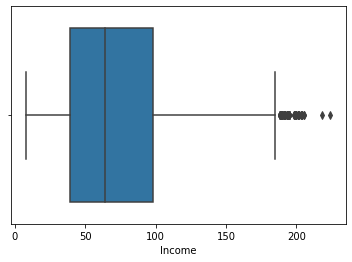

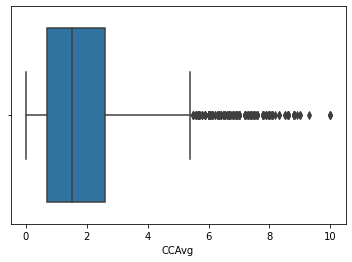

In [169]:
sns.boxplot(new_content.Income)
plot.show()
sns.boxplot(new_content.CCAvg)

As we observed, that the outliers are beyond the upper bound for _Income and CCAvg_, we need to discard them.

In [170]:
df = new_content[new_content["Income"]<upper_bound]

In [171]:
df = df[df["CCAvg"]<upper_bound1]

Now that we have removed the outliers, we can check if the outliers are reduced or not.

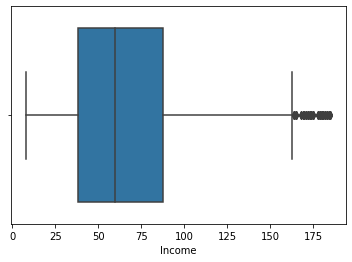

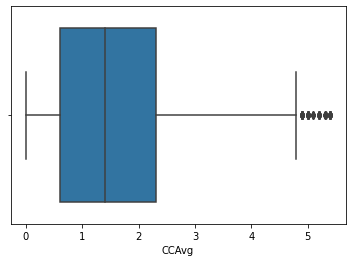

In [172]:
sns.boxplot(df.Income)
plot.show()
sns.boxplot(df.CCAvg)

_Mortgage_ is highly skewes towards right, hence applying IQR would delete most of important data. Hence we will try to scale it down using Square Root Transformation to check whether the outliers are reduced or not.

We'll handle the _Mortgage_ a little later, first we'll resolve the _Income and CCAVG_ features.

Below is a small report which gives us the idea about how the transformations affect our dataset realtionships.

Income:

1. Initial correlation after removing faulty data: 0.5042
2. Correlation after removing outliers using IQR: 0.4889, skewness: 0.8474
3. Correlation when Power Transformed: 0.42, skewness: -0.0387
4. Correlation when SqRt Transformed: 0.4396, skewness: 0.2238

CCAvg:

1. Initial correlation after removing faulty data: 0.3693
2. Correlation after removing outliers using IQR: 0.3441, skewness: 0.8793
3. Correlation when Power Transformed: 0.2859, skewness: 0.0031
4. Correlation when SqRt Transformed: 0.0.2911, skewness: -0.0414

I have applied P&C with various other transformations.
To check the report, you may visit: https://docs.google.com/document/d/1FI8T-UV2ntleTMvPozZtByskbn93FM_-C8Cvh_ggQok/edit?usp=sharing

The below transformation is the best I have got from the analysis.

Power Transformation is specifically built to reduce the skewness. You might have gone through the small report, you can see how Power Transformation is reducing the skewness of both the features.

[0.00317772]


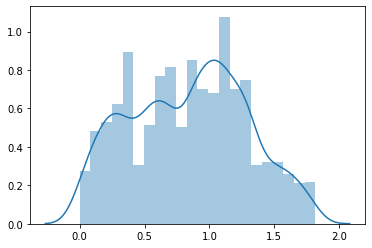

In [173]:
pt = PowerTransformer(method="yeo-johnson", standardize = False, )
pt.fit(df["CCAvg"].values.reshape(-1,1))
temp = pt.transform(df["CCAvg"].values.reshape(-1,1))

sns.distplot(temp)
print(scipy.stats.skew(temp))
df["CCAvg"] = temp

[-0.03878036]


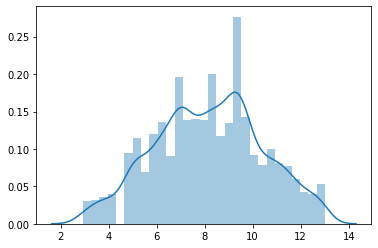

In [174]:
pt = PowerTransformer(method="box-cox", standardize = False)
pt.fit(df["Income"].values.reshape(-1,1))
temp = pt.transform(df["Income"].values.reshape(-1,1))

sns.distplot(temp)
print(scipy.stats.skew(temp))
df["Income"] = temp

We can see, skewness of <b>Income and CCAvg</b> have been reduced to a large extent.

Now let's check the updated correlation heatmap.

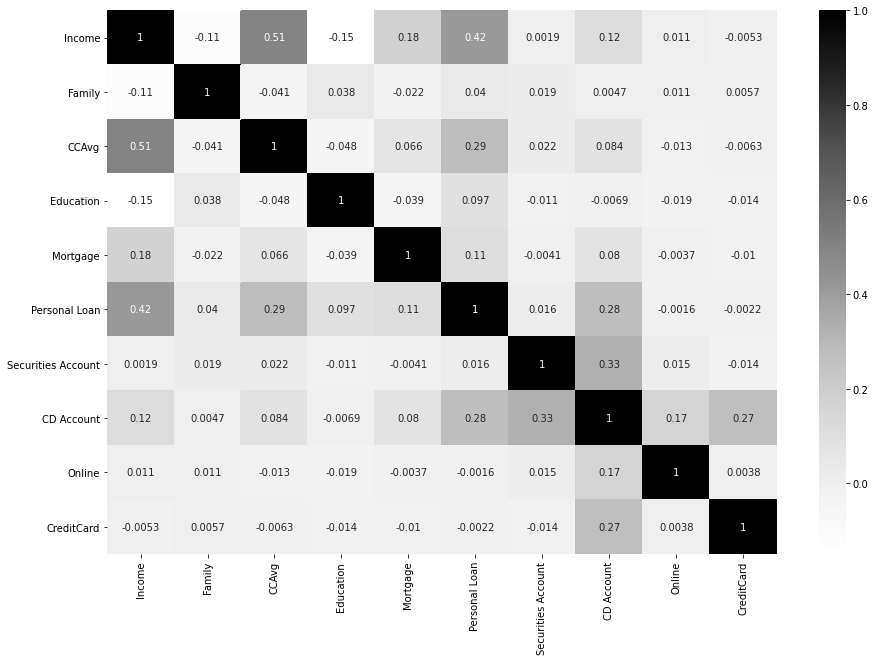

In [175]:
fig, ax = plot.subplots(figsize = (15,10))
sns.heatmap(df.corr(), cmap="Greys", annot = True)

Transformation of _Mortgage_ is done by using Square Root Transformtion. The reason is, this transformation is handling the outliers pretty well.

To get in-detail report, you can check the document that I attached above.

In [176]:
# Mortgage with sqrt
df["Mortgage"] = np.sqrt(df["Mortgage"])

Boxplotting can help us visualise to check if our Transformation is doing good or not.

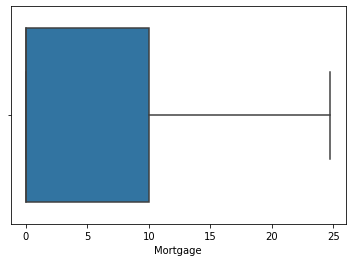

In [177]:
sns.boxplot(df.Mortgage)

You can even apply binning here. Binning merges all the values of a particular range into a single value. Can say, it is a type of Label Encoding.

In [178]:
# mort_bin = pd.cut(df["Mortgage"], bins=[0, 100, 200, 300, 400, 500, 600, 700], labels=[0, 1, 2, 3, 4, 5, 6], include_lowest=True)

In [179]:
# df["Mortgage"] = pd.DataFrame(mort_bin)

One last time, let's again check if our dataset is ready to train or not.

In [180]:
df.describe()

,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000
mean,8.172692,2.417699,0.839632,1.906067,3.937447,0.074799,0.104371,0.053272,0.595782,0.294194
std,2.235778,1.160143,0.451316,0.837027,6.164051,0.263095,0.305774,0.224601,0.490793,0.455729
min,2.917775,1.000000,-0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.726098,1.000000,0.467392,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8.237195,2.000000,0.866438,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,9.679586,4.000000,1.177169,3.000000,10.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,13.015481,4.000000,1.816008,3.000000,24.738634,1.000000,1.000000,1.000000,1.000000,1.000000


Our dataset is now far more better than what we initially had.

Next step is splitting our dataset for training and testing purpose.

## 5. Splitting the data into training and test set in the ratio of 70:30 respectively

Now it's time to drop our target variable from the dataset and store it in separate variable.

In [181]:
X = df.drop("Personal Loan", axis=1)
y = df["Personal Loan"]

If we remeber, the YES:NO ratio is really very very low. We can plot a countplot to recall that.

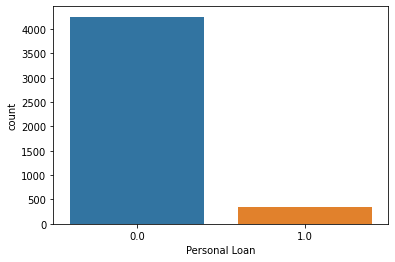

In [182]:
sns.countplot(y)

So if we split it randomly, there might be chances that very less amount of "YES" would come under training.<br> To avoid this, we use stratified splitting.

In [183]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0, test_size = 0.3)

random_states are integer value, which will remember our performance and splitting of our dataset. Inshort, It will preserve our model whenever we split it again.

We have splitted our dataset into training and testing set in 70 : 30 ratio.

## 6. Using the Logistic Regression model to predict the likelihood of a customer buying personal loans.

In [184]:
model = LogisticRegression(max_iter=1000)

Now that we have created the object of the Logistic Regression class, next we will fit our model.

In [185]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

We are now done with training our model.

Let's now check how our model performs to the test and train data.

In [186]:
predictions_test = model.predict(X_test)
predictions_train = model.predict(X_train)

The above 2 variables stores the predicted results. Now we can run various test to check the accuracy, precision, recall and f1-score.

In [187]:
recall_test_lr = metrics.recall_score(y_test, predictions_test)
precision_test_lr = metrics.precision_score(y_test, predictions_test)
f1_test_lr = metrics.f1_score(y_test, predictions_test)
acc_test_lr = metrics.accuracy_score(y_test, predictions_test)

recall_train_lr = metrics.recall_score(y_train, predictions_train)
precision_train_lr = metrics.precision_score(y_train, predictions_train)
f1_train_lr = metrics.f1_score(y_train, predictions_train)
acc_train_lr = metrics.accuracy_score(y_train, predictions_train)

We can make use of <b>pickle</b> library to save our model.

We can split the dataset multiple times, and check the accuracy score each time. Whenever our accuracy is more than the recorded best score. We will save the new model to the pickle file. 
<br>
So basically we are storing the model having highest accuracy.

In [188]:
# best_test_accuracy = 0
# best_train_accuracy = 0
# for iteration in range(50):
#     X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.3)

#     model = LogisticRegression(max_iter=1000)
#     model.fit(X_train, y_train)
#     predictions_test = model.predict(X_test)
#     predictions_train = model.predict(X_train)
#     test_accuracy = metrics.accuracy_score(y_test, predictions_test)
#     train_accuracy = metrics.accuracy_score(y_train, predictions_train)

#     print("Accuracy test: ", test_accuracy)
#     print("Accuracy train: ", train_accuracy)

#     if test_accuracy > best_test_accuracy and train_accuracy > best_train_accuracy:
        
#         best_test_accuracy = test_accuracy
#         best_train_accuracy = train_accuracy
#         with open("bank_loan_model.pickle", "wb") as file:
#             pickle.dump(model, file)

Now to access the saved model, we can load that file to our model from now on i.e. we dont't need to train our model again anad again.

In [189]:
# model_file = open("bank_loan_model.pickle", "rb")
# model = pickle.load(model_file)

## 7. Metrics calculation for evaluating the model performance



Report for test data

In [190]:
matrix_test = metrics.classification_report(y_test, predictions_test, labels=[0, 1], digits=5)
print("Report for test data:\n\n",matrix_test)

Report for test data:

               precision    recall  f1-score   support

           0    0.97531   0.98982   0.98251      1277
           1    0.84524   0.68932   0.75936       103

    accuracy                        0.96739      1380
   macro avg    0.91027   0.83957   0.87093      1380
weighted avg    0.96560   0.96739   0.96586      1380



Report for train data

In [191]:
matrix_train = metrics.classification_report(y_train, predictions_train, labels=[0, 1], digits=4)
print("Report for train data:\n\n",matrix_train)

Report for train data:

               precision    recall  f1-score   support

           0     0.9682    0.9903    0.9791      2978
           1     0.8324    0.5975    0.6957       241

    accuracy                         0.9609      3219
   macro avg     0.9003    0.7939    0.8374      3219
weighted avg     0.9580    0.9609    0.9579      3219



Confusion matrix returns a matrix having the correct and incorrect predictions.

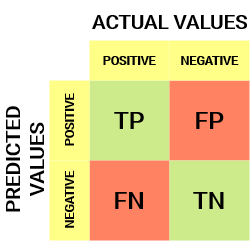

TP: True Positive<br>
FP: False Positive<br>
TN: True Negative<br>
FN: False Negative

It is better if False positives and False negatives are low.

In [192]:
conf_matrix_test = metrics.confusion_matrix(y_test, predictions_test)
conf_matrix_test

array([[1264,   13],
       [  32,   71]])

In [193]:
conf_matrix_train = metrics.confusion_matrix(y_train, predictions_train)
conf_matrix_train

array([[2949,   29],
       [  97,  144]])

<b>AUC ROC</b>  are another measure of calculating the efficiency of our model. In simple terms, it is the graph plotted with FPR on x-axis and TPR on y-axis.
<hr>
TPR: True positive rate<br>
FPR: False positive rate

AUC scores shows how likely our model can predict the values correctly. More the AUC value, better our model will perform.

In [194]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions_test)
auc_test_lr = metrics.auc(fpr, tpr)
auc_test_lr

0.8395701393587823

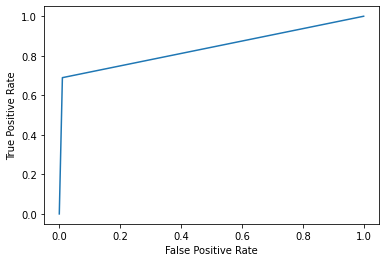

In [195]:
plot.plot(fpr, tpr)
plot.xlabel("False Positive Rate")
plot.ylabel("True Positive Rate")
plot.show()

Our graph seems pretty well 

In [196]:
fpr, tpr, thresholds = metrics.roc_curve(y_train, predictions_train)
auc_train_lr = metrics.auc(fpr, tpr)

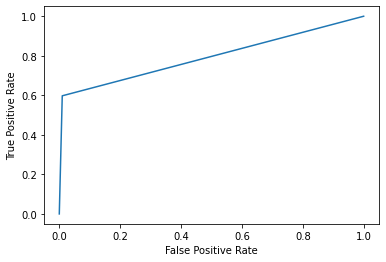

In [197]:
plot.plot(fpr, tpr)
plot.xlabel("False Positive Rate")
plot.ylabel("True Positive Rate")
plot.show()

Even on Train data it is performing balanced.

This ends our evaluation on Logistic Regression. Now we'll check how our dataset performs with other classification algorithms.

## 8. Comparison with other Classification algorithms

### Decision Tree

A Decision tree is a flowchart like tree structure, where each internal node denotes a test on an attribute, each branch represents an outcome of the test, and each leaf node holds a class label.



In [232]:
model_dt = DecisionTreeClassifier(max_depth=10, criterion="entropy")
model_dt.fit(X_train, y_train)
predictions_test_dt = model_dt.predict(X_test)
predictions_train_dt = model_dt.predict(X_train)
model_dt_test_report = metrics.classification_report(y_test, predictions_test_dt, digits=5)
print("Report for Test Data:\n",model_dt_test_report)
model_dt_train_report = metrics.classification_report(y_train, predictions_train_dt, digits=5)
print("Report for Train Data:\n",model_dt_train_report)
fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions_test_dt)
auc_test_dt = metrics.auc(fpr, tpr)
fpr, tpr, thresholds = metrics.roc_curve(y_train, predictions_train_dt)
auc_train_dt = metrics.auc(fpr, tpr)

#Confusion Matrices
print("\nConfusion matrix for Testing Data:\n",metrics.confusion_matrix(y_test, predictions_test_dt))
print("\nConfusion matrix for Training Data:\n",metrics.confusion_matrix(y_train, predictions_train_dt))

#individual scores
recall_test_dt = metrics.recall_score(y_test, predictions_test_dt)
precision_test_dt = metrics.precision_score(y_test, predictions_test_dt)
f1_test_dt = metrics.f1_score(y_test, predictions_test_dt)
acc_test_dt = metrics.accuracy_score(y_test, predictions_test_dt)

recall_train_dt = metrics.recall_score(y_train, predictions_train_dt)
precision_train_dt = metrics.precision_score(y_train, predictions_train_dt)
f1_train_dt = metrics.f1_score(y_train, predictions_train_dt)
acc_train_dt = metrics.accuracy_score(y_train, predictions_train_dt)

Report for Test Data:
               precision    recall  f1-score   support

         0.0    0.98673   0.98982   0.98827      1277
         1.0    0.86869   0.83495   0.85149       103

    accuracy                        0.97826      1380
   macro avg    0.92771   0.91239   0.91988      1380
weighted avg    0.97792   0.97826   0.97806      1380

Report for Train Data:
               precision    recall  f1-score   support

         0.0    0.99599   0.99966   0.99782      2978
         1.0    0.99565   0.95021   0.97240       241

    accuracy                        0.99596      3219
   macro avg    0.99582   0.97494   0.98511      3219
weighted avg    0.99596   0.99596   0.99592      3219


Confusion matrix for Testing Data:
 [[1264   13]
 [  17   86]]

Confusion matrix for Training Data:
 [[2977    1]
 [  12  229]]


### Random Forest

Random forest is a method, where a dataset is split into multiple sets and each is then trained using Decision trees. At the end, the output having maximum occurence is considered. Basically, as many trees are iterating at a time, hence the name Random forest. It is based on maximum vote system.

In [220]:
model_rf = RandomForestClassifier(n_estimators=10, max_depth=8, criterion="entropy")
model_rf.fit(X_train, y_train)
predictions_test_rf = model_rf.predict(X_test)
predictions_train_rf = model_rf.predict(X_train)
report_test_rf = metrics.classification_report(y_test, predictions_test_rf, digits=5)
print("Report for Test Data:\n",report_test_rf)
report_train_rf = metrics.classification_report(y_train, predictions_train_rf, digits=5)
print("Report for Train Data:\n",report_train_rf)
fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions_test_rf)
auc_test_rf = metrics.auc(fpr, tpr)
fpr, tpr, thresholds = metrics.roc_curve(y_train, predictions_train_rf)
auc_train_rf = metrics.auc(fpr, tpr)

#Confusion Matrices
print("\nConfusion matrix for Testing Data:\n",metrics.confusion_matrix(y_test, predictions_test_rf))
print("\nConfusion matrix for Traing Data:\n",metrics.confusion_matrix(y_train, predictions_train_rf))

#individual scores
recall_test_rf = metrics.recall_score(y_test, predictions_test_rf)
precision_test_rf = metrics.precision_score(y_test, predictions_test_rf)
f1_test_rf = metrics.f1_score(y_test, predictions_test_rf)
acc_test_rf = metrics.accuracy_score(y_test, predictions_test_rf)

recall_train_rf = metrics.recall_score(y_train, predictions_train_rf)
precision_train_rf = metrics.precision_score(y_train, predictions_train_rf)
f1_train_rf = metrics.f1_score(y_train, predictions_train_rf)
acc_train_rf = metrics.accuracy_score(y_train, predictions_train_rf)

Report for Test Data:
               precision    recall  f1-score   support

         0.0    0.98834   0.99608   0.99220      1277
         1.0    0.94624   0.85437   0.89796       103

    accuracy                        0.98551      1380
   macro avg    0.96729   0.92523   0.94508      1380
weighted avg    0.98520   0.98551   0.98517      1380

Report for Train Data:
               precision    recall  f1-score   support

         0.0    0.99665   0.99966   0.99816      2978
         1.0    0.99569   0.95851   0.97674       241

    accuracy                        0.99658      3219
   macro avg    0.99617   0.97909   0.98745      3219
weighted avg    0.99658   0.99658   0.99655      3219


Confusion matrix for Testing Data:
 [[1272    5]
 [  15   88]]

Confusion matrix for Traing Data:
 [[2977    1]
 [  10  231]]


### Naive Bayes

Naive Bayes classifiers are a collection of classification algorithms based on Bayes’ Theorem. It is not a single algorithm but a family of algorithms where all of them share a common principle, i.e. every pair of features being classified is independent of each other

In [200]:
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)
predictions_test_nb = model_nb.predict(X_test)
predictions_train_nb = model_nb.predict(X_train)
report_test_nb = metrics.classification_report(y_test, predictions_test_nb, digits=5)
print("Report for Test Data:\n",report_test_nb)
report_train_nb = metrics.classification_report(y_train, predictions_train_nb, digits=5)
print("Report for Train Data:\n",report_train_nb)
fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions_test_nb)
auc_test_nb = metrics.auc(fpr, tpr)
fpr, tpr, thresholds = metrics.roc_curve(y_train, predictions_train_nb)
auc_train_nb = metrics.auc(fpr, tpr)

#Confusion Matrices
print("\nConfusion matrix for Testing Data:\n",metrics.confusion_matrix(y_test, predictions_test_nb))
print("\nConfusion matrix for Traing Data:\n",metrics.confusion_matrix(y_train, predictions_train_nb))

#individual scores
recall_test_nb = metrics.recall_score(y_test, predictions_test_nb)
precision_test_nb = metrics.precision_score(y_test, predictions_test_nb)
f1_test_nb = metrics.f1_score(y_test, predictions_test_nb)
acc_test_nb = metrics.accuracy_score(y_test, predictions_test_nb)

recall_train_nb = metrics.recall_score(y_train, predictions_train_nb)
precision_train_nb = metrics.precision_score(y_train, predictions_train_nb)
f1_train_nb = metrics.f1_score(y_train, predictions_train_nb)
acc_train_nb = metrics.accuracy_score(y_train, predictions_train_nb)

Report for Test Data:
               precision    recall  f1-score   support

         0.0    0.95863   0.96163   0.96013      1277
         1.0    0.50505   0.48544   0.49505       103

    accuracy                        0.92609      1380
   macro avg    0.73184   0.72353   0.72759      1380
weighted avg    0.92477   0.92609   0.92541      1380

Report for Train Data:
               precision    recall  f1-score   support

         0.0    0.95697   0.97079   0.96383      2978
         1.0    0.56061   0.46058   0.50569       241

    accuracy                        0.93259      3219
   macro avg    0.75879   0.71568   0.73476      3219
weighted avg    0.92729   0.93259   0.92953      3219


Confusion matrix for Testing Data:
 [[1228   49]
 [  53   50]]

Confusion matrix for Traing Data:
 [[2891   87]
 [ 130  111]]


### KNN

KNN is an acronym for K Nearest Neighbours. This algorithm divides the scattered into a specific class based on their properties. At the testing, it checks the properties of the neighbouring points and based on the probability of each class it will classify the point into the predicted class.

In [201]:
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train, y_train)
predictions_test_knn = model_knn.predict(X_test)
predictions_train_knn = model_knn.predict(X_train)
knn_test_report = metrics.classification_report(y_test, predictions_test_knn, digits = 5)
print("Report for Test Data:\n",knn_test_report)
knn_train_report = metrics.classification_report(y_train, predictions_train_knn, digits = 5)
print("Report for Train Data:\n",knn_train_report)
fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions_test_knn)
auc_test_knn = metrics.auc(fpr, tpr)
fpr, tpr, thresholds = metrics.roc_curve(y_train, predictions_train_knn)
auc_train_knn = metrics.auc(fpr, tpr)

#Confusion Matrices
print("\nConfusion matrix for Testing Data:\n",metrics.confusion_matrix(y_test, predictions_test_knn))
print("\nConfusion matrix for Traing Data:\n",metrics.confusion_matrix(y_train, predictions_train_knn))

#individual scores
recall_test_knn = metrics.recall_score(y_test, predictions_test_knn)
precision_test_knn = metrics.precision_score(y_test, predictions_test_knn)
f1_test_knn = metrics.f1_score(y_test, predictions_test_knn)
acc_test_knn = metrics.accuracy_score(y_test, predictions_test_knn)

recall_train_knn = metrics.recall_score(y_train, predictions_train_knn)
precision_train_knn = metrics.precision_score(y_train, predictions_train_knn)
f1_train_knn = metrics.f1_score(y_train, predictions_train_knn)
acc_train_knn = metrics.accuracy_score(y_train, predictions_train_knn)

Report for Test Data:
               precision    recall  f1-score   support

         0.0    0.97097   0.99530   0.98299      1277
         1.0    0.91549   0.63107   0.74713       103

    accuracy                        0.96812      1380
   macro avg    0.94323   0.81318   0.86506      1380
weighted avg    0.96683   0.96812   0.96538      1380

Report for Train Data:
               precision    recall  f1-score   support

         0.0    0.97857   0.99664   0.98752      2978
         1.0    0.94624   0.73029   0.82436       241

    accuracy                        0.97670      3219
   macro avg    0.96240   0.86347   0.90594      3219
weighted avg    0.97615   0.97670   0.97531      3219


Confusion matrix for Testing Data:
 [[1271    6]
 [  38   65]]

Confusion matrix for Traing Data:
 [[2968   10]
 [  65  176]]


### Report 

Now as we have tested our dataset with various other algorithms, let's summarize them now.

In [233]:
report_test = pd.DataFrame(
    {
        "Models":["Logistic Regression", "Decision Tree", "Random Forest", "Naive Bayes", "KNN"],
        "Accuracy":[acc_test_lr, acc_test_dt, acc_test_rf, acc_test_nb, acc_test_knn],
        "Recall":[recall_test_lr, recall_test_dt, recall_test_rf, recall_test_nb, recall_test_knn],
        "Precision":[precision_test_lr, precision_test_dt, precision_test_rf, precision_test_nb, precision_test_knn],
        "F1-score":[f1_test_lr, f1_test_dt, f1_test_rf, f1_test_nb, f1_test_knn],
        "AUC-ROC score":[auc_test_lr, auc_test_dt, auc_test_rf, auc_test_nb, auc_test_knn] 
    }
)

In [234]:
report_train = pd.DataFrame(
    {
        "Models":["Logistic Regression", "Decision Tree", "Random Forest", "Naive Bayes", "KNN"],
        "Accuracy":[acc_train_lr, acc_train_dt, acc_train_rf, acc_train_nb, acc_train_knn],
        "Recall":[recall_train_lr, recall_train_dt, recall_train_rf, recall_train_nb, recall_train_knn],
        "Precision":[precision_train_lr, precision_train_dt, precision_train_rf, precision_train_nb, precision_train_knn],
        "F1-score":[f1_train_lr, f1_train_dt, f1_train_rf, f1_train_nb, f1_train_knn],
        "AUC-ROC score":[auc_train_lr, auc_train_dt, auc_train_rf, auc_train_nb, auc_train_knn] 
    }
)

In [235]:
print("Test Data report:\n\n")
report_test

Test Data report:




,Models,Accuracy,Recall,Precision,F1-score,AUC-ROC score
0,Logistic Regression,0.967391,0.689320,0.845238,0.759358,0.839570
1,Decision Tree,0.978261,0.834951,0.868687,0.851485,0.912386
2,Random Forest,0.985507,0.854369,0.946237,0.897959,0.925227
3,Naive Bayes,0.926087,0.485437,0.505051,0.495050,0.723533
4,KNN,0.968116,0.631068,0.915493,0.747126,0.813185


In [236]:
print("Train Data report:\n\n")
report_train

Train Data report:




,Models,Accuracy,Recall,Precision,F1-score,AUC-ROC score
0,Logistic Regression,0.960857,0.597510,0.832370,0.695652,0.793886
1,Decision Tree,0.995961,0.950207,0.995652,0.972399,0.974936
2,Random Forest,0.996583,0.958506,0.995690,0.976744,0.979085
3,Naive Bayes,0.932588,0.460581,0.560606,0.505695,0.715683
4,KNN,0.976701,0.730290,0.946237,0.824356,0.863466


Hence, observing the above reports, we can conclude that our dataset works better with **Random forest** and **Decision tree** algorithm.

## Business understanding of our model

We have imported all the necessary required models for our project.<br>

Looking into the raw dataset, we observed that there were some faulty data (some Experience values were below 0 which is not possible) in _Experience_ columns. Hence, as the data was incorrect, it is better to remove the entire rows from our dataset.<br>

_ID_ being different for each custmer, it was better to drop that column. Also, when we tested the correlations of feature variables with our Target variable, it was observed that _Age and Experience_ was not so related with Target variable. Aslo noticed one thing, _ZIP Code_ was also not of much use. So, inshort, we dropped 4 columns, which are
- _ID_
- _Age_
- _Experience_
- _ZIP Code_

